In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#) reading pandas
df = pd.read_csv(r"D:\Sudharsan\Guvi_Data science\DS101_Sudharsan\Mainboot camp\data\adult.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#) to count the number of rows in the adult data
df.count()

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

In [4]:
#) to replace the question marks with nan
df = df.replace("?",np.nan)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [5]:
#) to get the unique names in workclass column
df['workclass'].unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
#) to count the most repeated names(mode) in the column workclass
df['workclass'].mode()

0    Private
Name: workclass, dtype: object

In [7]:
#) to count the mode
df[df['workclass'] == 'Private'].count()

age                33906
workclass          33906
fnlwgt             33906
education          33906
educational-num    33906
marital-status     33906
occupation         33906
relationship       33906
race               33906
gender             33906
capital-gain       33906
capital-loss       33906
hours-per-week     33906
native-country     33307
income             33906
dtype: int64

In [8]:
#) to get the unique names in occupation column
df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', nan,
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [9]:
#) to get the most repeated names(mode) in the column occupation
df['occupation'].mode()

0    Prof-specialty
Name: occupation, dtype: object

In [10]:
#) to count the most repeated names(mode) in the column occupation
df[df['occupation'] == 'Prof-specialty'].count()

age                6172
workclass          6172
fnlwgt             6172
education          6172
educational-num    6172
marital-status     6172
occupation         6172
relationship       6172
race               6172
gender             6172
capital-gain       6172
capital-loss       6172
hours-per-week     6172
native-country     6008
income             6172
dtype: int64

In [11]:
#) to get the unique names in native-country column
df['native-country'].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [12]:
#) to get the most repeated names(mode) in the column native-country
df['native-country'].mode()

0    United-States
Name: native-country, dtype: object

In [13]:
#) to count the most repeated names(mode) in the column native-country
df[df['native-country'] == 'United-States'].count()

age                43832
workclass          41302
fnlwgt             43832
education          43832
educational-num    43832
marital-status     43832
occupation         41292
relationship       43832
race               43832
gender             43832
capital-gain       43832
capital-loss       43832
hours-per-week     43832
native-country     43832
income             43832
dtype: int64

In [14]:
#) replacing the all the nan values
replace= {'workclass':df['workclass'].mode()[0],'occupation':df['occupation'].mode()[0],'native-country':df['native-country'].mode()[0]}
temp_df = df.fillna(value=replace)
temp_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [15]:
#) to count the number of rows after filling mode in the columns
temp_df.count()

age                48842
workclass          48842
fnlwgt             48842
education          48842
educational-num    48842
marital-status     48842
occupation         48842
relationship       48842
race               48842
gender             48842
capital-gain       48842
capital-loss       48842
hours-per-week     48842
native-country     48842
income             48842
dtype: int64

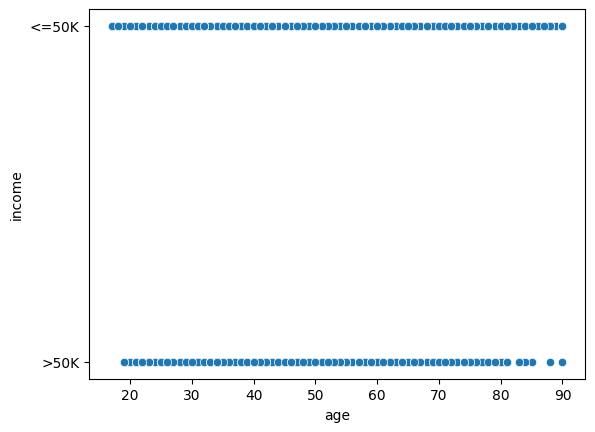

In [16]:
#) plot
sns.scatterplot(data=temp_df,x ="age",y= "income")
plt.show()

In [17]:
#) converting catagorical names into numerical value
le = LabelEncoder()

cols = [
    'workclass','education','educational-num','marital-status',
    'occupation','relationship','race','gender','native-country','income'
]
for col in cols:
    temp_df[col] = le.fit_transform(temp_df[col])
temp_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,6,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,8,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,11,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,9,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,9,4,9,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,11,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,8,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,8,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,8,4,0,3,4,1,0,0,20,38,0


In [18]:
#) logistic regression and KN for mode fill
X = temp_df.drop(['income'],axis=1)
y = temp_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"*******{type(model).__name__}*******")
    print('*******Train*******')
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 Score: {f1_score(y_train,train_pred)}")
    print('*******Test*******')
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 Score: {f1_score(y_test,test_pred)}")
    print("\n\n")

C:\Users\sjsud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*******LogisticRegression*******
*******Train*******
Accuracy: 0.7931563995597983
Precision: 0.6405959031657356
Recall: 0.296232508073197
F1 Score: 0.405122920653614
*******Test*******
Accuracy: 0.7823728119561879
Precision: 0.61792863359443
Recall: 0.29620358781810596
F1 Score: 0.4004512126339537



*******KNeighborsClassifier*******
*******Train*******
Accuracy: 0.837330125662222
Precision: 0.7530182821662642
Recall: 0.469967707212056
F1 Score: 0.5787380699893956
*******Test*******
Accuracy: 0.7714197973180469
Precision: 0.5551075268817204
Recall: 0.3445974134334585
F1 Score: 0.4252252252252252





In [8]:
#) SVM for modefill
X = temp_df.drop(['income'],axis=1)
y = temp_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = SVC()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('*******Train*******')
print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Precision: {precision_score(y_train,train_pred)}")
print(f"Recall: {recall_score(y_train,train_pred)}")
print(f"F1 Score: {f1_score(y_train,train_pred)}")
print('*******Test*******')
print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Precision: {precision_score(y_test,test_pred)}")
print(f"Recall: {recall_score(y_test,test_pred)}")
print(f"F1 Score: {f1_score(y_test,test_pred)}")
print("\n\n")

*******Train*******
Accuracy: 0.8370486013359609
Precision: 0.7582648242085009
Recall: 0.46512875536480686
F1 Score: 0.5765777748221055
*******Test*******
Accuracy: 0.7790971440270242
Precision: 0.5755603759942155
Recall: 0.336290663286861
F1 Score: 0.4245333333333333





In [16]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [17]:
#) to replace the question marks with nan
df = df.replace("?",np.nan)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
forward_df = df.ffill()
forward_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
forward_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
#) forward fill
le = LabelEncoder()

cols = [
    'workclass','education','educational-num','marital-status',
    'occupation','relationship','race','gender','native-country','income'
]
for col in cols:
    forward_df[col] = le.fit_transform(forward_df[col])
forward_df
X = forward_df.drop(['income'],axis=1)
y = forward_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"*******{type(model).__name__}*******")
    print('*******Train*******')
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 Score: {f1_score(y_train,train_pred)}")
    print('*******Test*******')
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 Score: {f1_score(y_test,test_pred)}")
    print("\n\n")

C:\Users\sjsud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*******LogisticRegression*******
*******Train*******
Accuracy: 0.791646405446216
Precision: 0.6475351274112884
Recall: 0.28987206823027717
F1 Score: 0.4004713160026512
*******Test*******
Accuracy: 0.7929163681031836
Precision: 0.6408730158730159
Recall: 0.2800173385348938
F1 Score: 0.38974358974358975



*******KNeighborsClassifier*******
*******Train*******
Accuracy: 0.8369462288536841
Precision: 0.757840616966581
Recall: 0.4714285714285714
F1 Score: 0.5812684850476504
*******Test*******
Accuracy: 0.7809397072371789
Precision: 0.5618060695780903
Recall: 0.328998699609883
F1 Score: 0.4149808638600328





In [24]:
#) SVM for forward fill
X = forward_df.drop(['income'],axis=1)
y = forward_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = SVC()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('*******Train*******')
print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Precision: {precision_score(y_train,train_pred)}")
print(f"Recall: {recall_score(y_train,train_pred)}")
print(f"F1 Score: {f1_score(y_train,train_pred)}")
print('*******Test*******')
print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Precision: {precision_score(y_test,test_pred)}")
print(f"Recall: {recall_score(y_test,test_pred)}")
print(f"F1 Score: {f1_score(y_test,test_pred)}")
print("\n\n")

*******Train*******
Accuracy: 0.8357177590663629
Precision: 0.7554131300883423
Recall: 0.46552092228864217
F1 Score: 0.5760517799352751
*******Test*******
Accuracy: 0.7810420718599652
Precision: 0.5639204545454546
Recall: 0.3423889607589478
F1 Score: 0.4260799570700295





In [3]:
#) to replace the question marks with nan
df = df.replace("?",np.nan)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [4]:
backward_df = df.bfill()
backward_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
backward_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
#) forward fill
le = LabelEncoder()

cols = [
    'workclass','education','educational-num','marital-status',
    'occupation','relationship','race','gender','native-country','income'
]
for col in cols:
    backward_df[col] = le.fit_transform(backward_df[col])
forward_df
X = backward_df.drop(['income'],axis=1)
y = backward_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"*******{type(model).__name__}*******")
    print('*******Train*******')
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 Score: {f1_score(y_train,train_pred)}")
    print('*******Test*******')
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 Score: {f1_score(y_test,test_pred)}")
    print("\n\n")

C:\Users\sjsud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*******LogisticRegression*******
*******Train*******
Accuracy: 0.7931052133186599
Precision: 0.6363848124854414
Recall: 0.2951917882225824
F1 Score: 0.4033067611455565
*******Test*******
Accuracy: 0.7879005015866517
Precision: 0.6654411764705882
Recall: 0.29769736842105265
F1 Score: 0.4113636363636364



*******KNeighborsClassifier*******
*******Train*******
Accuracy: 0.8379443605558826
Precision: 0.7563585335905981
Recall: 0.4659103187466234
F1 Score: 0.5766247659802086
*******Test*******
Accuracy: 0.7752072883611424
Precision: 0.5860058309037901
Recall: 0.3305921052631579
F1 Score: 0.4227129337539432





In [11]:
#) SVM for forward fill
X = backward_df.drop(['income'],axis=1)
y = backward_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = SVC()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('*******Train*******')
print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Precision: {precision_score(y_train,train_pred)}")
print(f"Recall: {recall_score(y_train,train_pred)}")
print(f"F1 Score: {f1_score(y_train,train_pred)}")
print('*******Test*******')
print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Precision: {precision_score(y_test,test_pred)}")
print(f"Recall: {recall_score(y_test,test_pred)}")
print(f"F1 Score: {f1_score(y_test,test_pred)}")
print("\n\n")

*******Train*******
Accuracy: 0.8359992833926241
Precision: 0.7536035272172291
Recall: 0.4728162570486222
F1 Score: 0.5810669456066946
*******Test*******
Accuracy: 0.7765380284573651
Precision: 0.5363321799307958
Recall: 0.3387237762237762
F1 Score: 0.41521564425395124





In [17]:
df = df.replace("?",np.nan)
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [27]:
nadrop_df = df.dropna()
nadrop_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
nadrop_df.count()

age                45222
workclass          45222
fnlwgt             45222
education          45222
educational-num    45222
marital-status     45222
occupation         45222
relationship       45222
race               45222
gender             45222
capital-gain       45222
capital-loss       45222
hours-per-week     45222
native-country     45222
income             45222
dtype: int64

In [30]:
#) dropna
le = LabelEncoder()

cols = [
    'workclass','education','educational-num','marital-status',
    'occupation','relationship','race','gender','native-country','income'
]
for col in cols:
    nadrop_df[col] = le.fit_transform(nadrop_df[col])
nadrop_df
X = nadrop_df.drop(['income'],axis=1)
y = nadrop_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"*******{type(model).__name__}*******")
    print('*******Train*******')
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 Score: {f1_score(y_train,train_pred)}")
    print('*******Test*******')
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 Score: {f1_score(y_test,test_pred)}")
    print("\n\n")

C:\Users\sjsud\AppData\Local\Temp\ipykernel_10512\550991287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nadrop_df[col] = le.fit_transform(nadrop_df[col])
C:\Users\sjsud\AppData\Local\Temp\ipykernel_10512\550991287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nadrop_df[col] = le.fit_transform(nadrop_df[col])
C:\Users\sjsud\AppData\Local\Temp\ipykernel_10512\550991287.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

*******LogisticRegression*******
*******Train*******
Accuracy: 0.7845592503524339
Precision: 0.6412395709177592
Recall: 0.29958792738612317
F1 Score: 0.4083801427053287
*******Test*******
Accuracy: 0.7823106688778331
Precision: 0.6302605210420842
Recall: 0.2821893225661732
F1 Score: 0.38983576076851567



*******KNeighborsClassifier*******
*******Train*******
Accuracy: 0.8317439256986483
Precision: 0.7572038420490929
Recall: 0.4741062479117942
F1 Score: 0.5831107458393261
*******Test*******
Accuracy: 0.7698175787728027
Precision: 0.5568445475638051
Recall: 0.32301480484522205
F1 Score: 0.4088586030664395





In [39]:
#) SVM for drpna
X = nadrop_df.drop(['income'],axis=1)
y = nadrop_df['income']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = SVC()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('*******Train*******')
print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Precision: {precision_score(y_train,train_pred)}")
print(f"Recall: {recall_score(y_train,train_pred)}")
print(f"F1 Score: {f1_score(y_train,train_pred)}")
print('*******Test*******')
print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Precision: {precision_score(y_test,test_pred)}")
print(f"Recall: {recall_score(y_test,test_pred)}")
print(f"F1 Score: {f1_score(y_test,test_pred)}")
print("\n\n")

*******Train*******
Accuracy: 0.8311358045166819
Precision: 0.7564125243233681
Recall: 0.4746891651865009
F1 Score: 0.5833162812904986
*******Test*******
Accuracy: 0.7703703703703704
Precision: 0.5453874538745388
Recall: 0.33590909090909093
F1 Score: 0.4157524613220816





In [8]:
import seaborn as sns
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [9]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [10]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
replace= {'age':df['age'].mean(),'embarked':df['embarked'].mode()[0],'deck':df['deck'].mode()[0],'embark_town':df['embark_town'].mode()[0]}
temp_df = df.fillna(value=replace)
temp_df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [27]:
#) dropna
le = LabelEncoder()
#temp_df.drop(['class','deck','embark_town'],axis=1,inplace=True)
cols = [
    'sex','embarked','who','adult_male','alive','alone'
]
for col in cols:
    temp_df[col] = le.fit_transform(temp_df[col])
temp_df
X = temp_df.drop(['survived'],axis=1)
y = temp_df['survived']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier()]
for model in models:
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    print(f"*******{type(model).__name__}*******")
    print('*******Train*******')
    print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
    print(f"Precision: {precision_score(y_train,train_pred)}")
    print(f"Recall: {recall_score(y_train,train_pred)}")
    print(f"F1 Score: {f1_score(y_train,train_pred)}")
    print('*******Test*******')
    print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
    print(f"Precision: {precision_score(y_test,test_pred)}")
    print(f"Recall: {recall_score(y_test,test_pred)}")
    print(f"F1 Score: {f1_score(y_test,test_pred)}")
    print("\n\n")

*******LogisticRegression*******
*******Train*******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
*******Test*******
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0



*******KNeighborsClassifier*******
*******Train*******
Accuracy: 0.8370786516853933
Precision: 0.7977099236641222
Recall: 0.7683823529411765
F1 Score: 0.7827715355805244
*******Test*******
Accuracy: 0.776536312849162
Precision: 0.75
Recall: 0.6428571428571429
F1 Score: 0.6923076923076923





C:\Users\sjsud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
temp_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,1,1,0,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,0,1,1
3,1,1,0,35.000000,1,0,53.1000,2,2,0,1,0
4,0,3,1,35.000000,0,0,8.0500,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,0,1
887,1,1,0,19.000000,0,0,30.0000,2,2,0,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,0,0,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,1,1


In [15]:
#) SVM for drpna

X = temp_df.drop(['survived'],axis=1)
y = temp_df['survived']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = SVC()
model.fit(x_train,y_train)
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print('*******Train*******')
print(f"Accuracy: {accuracy_score(y_train,train_pred)}")
print(f"Precision: {precision_score(y_train,train_pred)}")
print(f"Recall: {recall_score(y_train,train_pred)}")
print(f"F1 Score: {f1_score(y_train,train_pred)}")
print('*******Test*******')
print(f"Accuracy: {accuracy_score(y_test,test_pred)}")
print(f"Precision: {precision_score(y_test,test_pred)}")
print(f"Recall: {recall_score(y_test,test_pred)}")
print(f"F1 Score: {f1_score(y_test,test_pred)}")
print("\n\n")

*******Train*******
Accuracy: 0.851123595505618
Precision: 0.8360655737704918
Recall: 0.7555555555555555
F1 Score: 0.7937743190661478
*******Test*******
Accuracy: 0.7039106145251397
Precision: 0.6557377049180327
Recall: 0.5555555555555556
F1 Score: 0.6015037593984962





In [16]:
temp_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,2,0,1,1


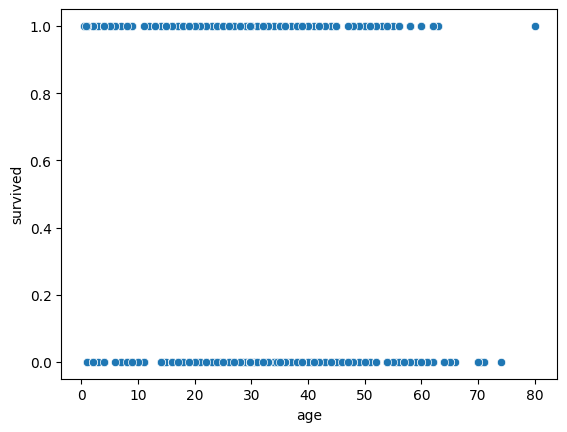

In [17]:
#) plot
sns.scatterplot(data=temp_df,x ="age",y= "survived")
plt.show()